In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
inpute = pd.read_csv('Input_hotel.csv', delimiter=";", decimal=",")
del inpute['observation_date']

In [5]:
INDPRO = inpute['INDPRO']
M1 = inpute['M1']
InfRate = inpute['Inflation rate']
household = inpute['household final consumption']
intRate = inpute['Interest rate']
y = inpute['Hotel & Restaurant']
tab = [INDPRO, M1, InfRate, household, intRate, y]
tab_name = ["INDPRO","M1", "Inflation rate", "household final consumption", "Interest rate", "Hotel & Restaurant"]

In [6]:
df_first_difference = pd.DataFrame()
i = 0
for a in tab:
    b = a.shift(1)
    first_diff = a - b
    df_first_difference[tab_name[i]] = first_diff
    i += 1
df_first_difference =  df_first_difference[1:]

# Modèles sur courbe

In [7]:
inpute_train = inpute[:93]
inpute_test = inpute[93:]

## OLS

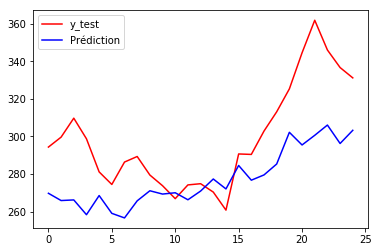

In [10]:
reg = linear_model.LinearRegression()
y = inpute_train['Hotel & Restaurant']
x = inpute_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = inpute_test['Hotel & Restaurant']
x_test = inpute_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [11]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [12]:
b

,mse,mae,r2
0,790.304541,23.322948,-0.060564


## Lasso

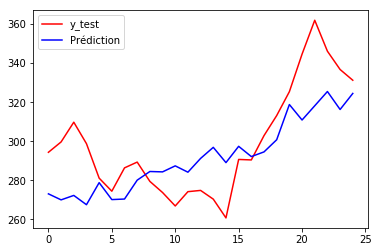

In [14]:
reg = linear_model.Lasso(alpha=0.1)
y = inpute_train['Hotel & Restaurant']
x = inpute_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = inpute_test['Hotel & Restaurant']
x_test = inpute_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [15]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [16]:
b

,mse,mae,r2
0,430.850262,17.199804,0.421812


## Ridge

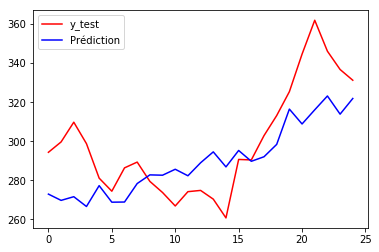

In [17]:
reg = linear_model.Ridge(alpha=0.1)
y = inpute_train['Hotel & Restaurant']
x = inpute_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
temp = reg.score(x,y)
y_test = inpute_test['Hotel & Restaurant']
x_test = inpute_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [18]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [19]:
b

,mse,mae,r2
0,449.91747,17.589908,0.396225


## Corrélation entre variables

In [20]:
inpute.corr()

,INDPRO,M1,Inflation rate,household final consumption,Interest rate,Hotel & Restaurant
INDPRO,1.000000,0.695322,0.241420,-0.395673,-0.662551,0.764590
M1,0.695322,1.000000,-0.257601,-0.292439,-0.571007,0.969156
Inflation rate,0.241420,-0.257601,1.000000,0.148778,-0.080642,-0.194439
household final consumption,-0.395673,-0.292439,0.148778,1.000000,0.524354,-0.282253
Interest rate,-0.662551,-0.571007,-0.080642,0.524354,1.000000,-0.545491
Hotel & Restaurant,0.764590,0.969156,-0.194439,-0.282253,-0.545491,1.000000


# Modèles sur première différence

In [21]:
df_first_diff_train = df_first_difference[:93]
df_first_diff_test = df_first_difference[93:]

## OLS

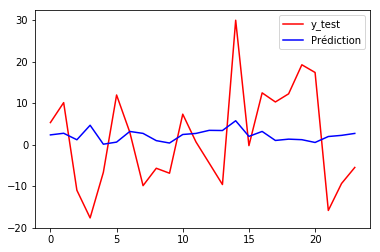

In [23]:
reg = linear_model.LinearRegression()
y = df_first_diff_train['Hotel & Restaurant']
x = df_first_diff_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_test['Hotel & Restaurant']
x_test = df_first_diff_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [24]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [25]:
b

,mse,mae,r2
0,141.980409,10.243264,-0.004419


## Ridge

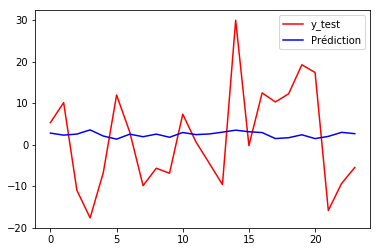

In [26]:
reg = linear_model.Ridge(alpha = 0.1)
y = df_first_diff_train['Hotel & Restaurant']
x = df_first_diff_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_test['Hotel & Restaurant']
x_test = df_first_diff_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [27]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [28]:
b

,mse,mae,r2
0,144.439655,10.381544,-0.021817


## Lasso

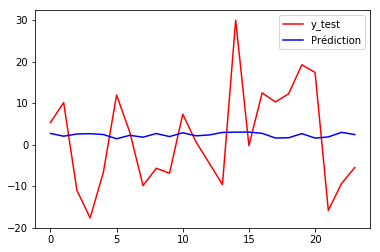

In [30]:
reg = linear_model.Lasso(alpha = 0.1)
y = df_first_diff_train['Hotel & Restaurant']
x = df_first_diff_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_test['Hotel & Restaurant']
x_test = df_first_diff_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [31]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [32]:
b

,mse,mae,r2
0,143.372569,10.354982,-0.014268


## Gradient boosting

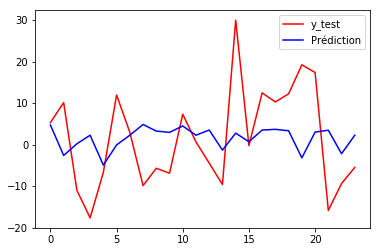

In [33]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 5,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(x, y)
nouveau = clf.predict(x_test)
plt.plot(y_test, 'r', label='y_test')
plt.plot(nouveau, 'b', label='Prédiction')
plt.legend()
plt.show()

In [34]:
a = pd.Series([mean_squared_error(y_test, nouveau), mean_absolute_error(y_test, nouveau), r2_score(y_test, nouveau)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [35]:
b

,mse,mae,r2
0,145.979602,9.861364,-0.032711


## Grid search

In [111]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(100,500,50), 'max_depth': [4,8], 'min_samples_split': [2,5],
          'learning_rate': [0.01,0.05] }
clf = ensemble.GradientBoostingRegressor(random_state=1)
clf.fit(x, y)
clf_gss=GridSearchCV(clf, params,scoring = 'r2',cv=5)
clf_gss.fit(x,y)
print('--')

--


In [112]:
clf_gss.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

## Corrélation entre variables

In [55]:
df_first_difference.corr()

,INDPRO,M1,Inflation rate,household final consumption,Interest rate,Hotel & Restaurant
INDPRO,1.000000,0.214082,0.211278,-0.134186,0.012748,0.095214
M1,0.214082,1.000000,-0.000156,-0.003756,-0.155321,-0.004579
Inflation rate,0.211278,-0.000156,1.000000,0.052732,-0.028370,0.062011
household final consumption,-0.134186,-0.003756,0.052732,1.000000,0.020940,-0.031661
Interest rate,0.012748,-0.155321,-0.028370,0.020940,1.000000,0.181195
Hotel & Restaurant,0.095214,-0.004579,0.062011,-0.031661,0.181195,1.000000


# Modèle sur première différence des ln

In [37]:
df_first_difference_ln = pd.DataFrame()
i = 0
for a in tab:
    a_ln = np.log(a)
    b = a_ln.shift(1)
    first_diff = a_ln - b
    df_first_difference_ln[tab_name[i]] = first_diff
    i += 1
df_first_difference_ln =  df_first_difference_ln[1:]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [38]:
df_first_difference_ln = df_first_difference_ln.drop(['household final consumption'], axis=1)
df_first_difference_ln = df_first_difference_ln.drop(['Inflation rate'], axis=1)

In [39]:
df_first_diff_ln_train = df_first_difference[:93]
df_first_diff_ln_test = df_first_difference[93:]

## OLS

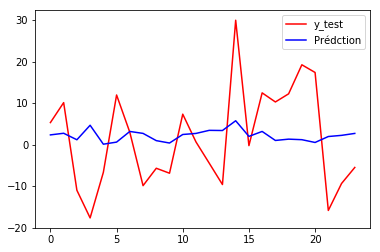

In [40]:
reg = linear_model.LinearRegression()
y = df_first_diff_ln_train['Hotel & Restaurant']
x = df_first_diff_ln_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_ln_test['Hotel & Restaurant']
x_test = df_first_diff_ln_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédction')
plt.legend()
plt.show()

In [41]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [42]:
b

,mse,mae,r2
0,141.980409,10.243264,-0.004419


## Ridge

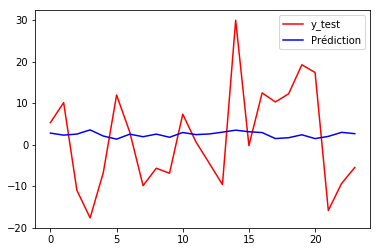

In [43]:
reg = linear_model.Ridge(alpha = 0.1)
y = df_first_diff_ln_train['Hotel & Restaurant']
x = df_first_diff_ln_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_ln_test['Hotel & Restaurant']
x_test = df_first_diff_ln_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [44]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [45]:
b

,mse,mae,r2
0,144.439655,10.381544,-0.021817


## Lasso

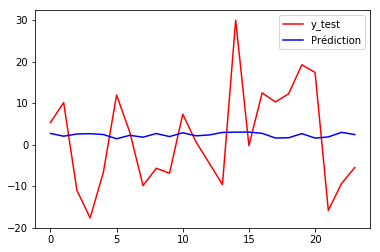

In [46]:
reg = linear_model.Lasso(alpha = 0.1)
y = df_first_diff_ln_train['Hotel & Restaurant']
x = df_first_diff_ln_train.drop(['Hotel & Restaurant'], axis=1)
reg.fit(x,y)
reg.score(x,y)
y_test = df_first_diff_ln_test['Hotel & Restaurant']
x_test = df_first_diff_ln_test.drop(['Hotel & Restaurant'], axis=1)
pred = reg.predict(x_test)
y_test = y_test.reset_index()['Hotel & Restaurant']
plt.plot(y_test, 'r', label='y_test')
plt.plot(pred, 'b', label='Prédiction')
plt.legend()
plt.show()

In [47]:
a = pd.Series([mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [48]:
b

,mse,mae,r2
0,143.372569,10.354982,-0.014268


## Gradient boosting

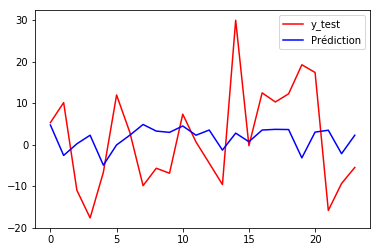

In [49]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 5,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(x, y)
nouveau = clf.predict(x_test)
plt.plot(y_test, 'r', label='y_test')
plt.plot(nouveau, 'b', label='Prédiction')
plt.legend()
plt.show()

In [50]:
a = pd.Series([mean_squared_error(y_test, nouveau), mean_absolute_error(y_test, nouveau), r2_score(y_test, nouveau)])
b = pd.DataFrame(data=[a])
b.columns = ['mse', 'mae', 'r2']

In [51]:
b

,mse,mae,r2
0,145.77142,9.849461,-0.031238


## Grid search

In [96]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(100,500,50), 'max_depth': [4,8], 'min_samples_split': [2,5],
          'learning_rate': [0.01,0.05] }
clf = ensemble.GradientBoostingRegressor(random_state=1)
clf.fit(x, y)
clf_gss=GridSearchCV(clf, params,scoring = 'r2',cv=5)
clf_gss.fit(x,y)
print('--')

--


In [97]:
clf_gss.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

## Corrélation entre variables

In [78]:
df_first_difference_ln.corr()

,INDPRO,M1,Interest rate,Hotel & Restaurant
INDPRO,1.000000,0.160928,0.016458,0.042705
M1,0.160928,1.000000,-0.123051,0.074387
Interest rate,0.016458,-0.123051,1.000000,0.083797
Hotel & Restaurant,0.042705,0.074387,0.083797,1.000000
